In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from pandas import Series 
from numpy.random import randn
import os
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
path = "./data/master_dataset_1700-2021_v2.csv"
df = pd.read_csv(path)
df.head()

,Year,Country,Population,Life Expectancy Years,GDP (income per capita),Fertility Rate,Child Motality 0-5 YO,Education (female 15-44),Contraceptive Use percent,Education (yrs based on index)
0,1799,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN,NaN
1,1800,Bangladesh,19200000,25.5,876,6.7,508.0,NaN,NaN,NaN
2,1801,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN
3,1802,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN
4,1803,Bangladesh,19300000,25.5,876,6.7,508.0,NaN,NaN,NaN


In [3]:
c_mort = df[['Country', 'Year', 'Fertility Rate', 'Child Motality 0-5 YO']]

In [4]:
c_mort.head()

,Country,Year,Fertility Rate,Child Motality 0-5 YO
0,Bangladesh,1799,6.7,508.0
1,Bangladesh,1800,6.7,508.0
2,Bangladesh,1801,6.7,508.0
3,Bangladesh,1802,6.7,508.0
4,Bangladesh,1803,6.7,508.0


In [5]:

data = c_mort.values
X=data[:, 1:4]
y=data[:, 0]

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [7]:
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
pd.get_dummies(y)

,Bangladesh,Brazil,China,"Congo, Dem. Rep.",Egypt,Ethiopia,India,Indonesia,Japan,Nigeria,Pakistan,Russia,Tanzania,United States
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3118,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3119,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3120,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
X = c_mort[['Country', 'Child Motality 0-5 YO']]
y = c_mort['Fertility Rate'].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (3122, 2) (3122, 1)


In [10]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Child Motality 0-5 YO,Country_Bangladesh,Country_Brazil,Country_China,"Country_Congo, Dem. Rep.",Country_Egypt,Country_Ethiopia,Country_India,Country_Indonesia,Country_Japan,Country_Nigeria,Country_Pakistan,Country_Russia,Country_Tanzania,Country_United States
1208,448.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2086,438.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1929,136.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2530,422.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1558,33.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

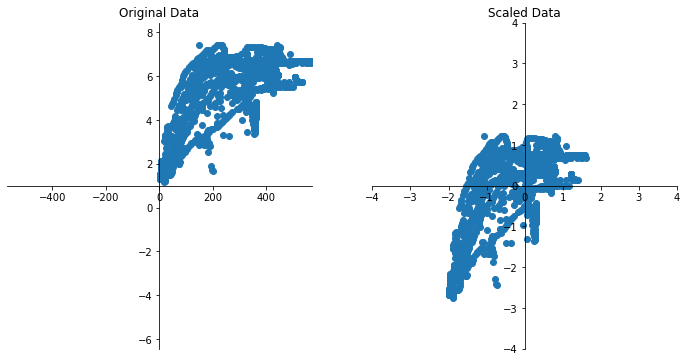

In [14]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title('Original Data')
axes2.set_title('Scaled Data')

maxx = X_train['Child Motality 0-5 YO'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-4, 4)
axes2.set_ylim(-4, 4)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['Child Motality 0-5 YO'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

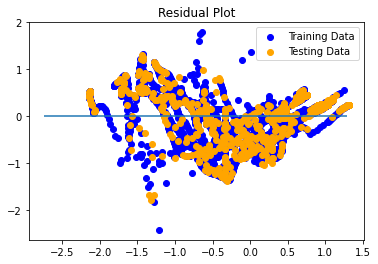

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.26693156414311026, R2: 0.7367725971973562
